In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('Data/ALL_BAEDANG_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('Data/ALL_SILH_SUIK_RT_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,Current(20180918),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5005,Unnamed: 5006,Unnamed: 5007,Unnamed: 5008,Unnamed: 5009,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),...,NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C),NFCF-IFRS(C)
3,Item,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,...,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002,6000706002
4,Item Name,"수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)",...,"수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)","수정배당수익률(보통주,현금)(%)"
5,Frequency,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,...,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL,ANNUAL
6,1990-01-31,2.88,NaN,NaN,2.91,NaN,NaN,NaN,0.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def Preprocessing(raw, column):
    
    CD_list = list(raw.iloc[0,1:])
    name_list = list(raw.iloc[1,1:])
    month_list = list(raw.iloc[6:,0].apply(lambda x: x.replace('-','')))
    
    if column == '기업명':
        df = pd.DataFrame(raw.iloc[6:,1:].values,
                         index = month_list,
                         columns = name_list)
    elif column == '심볼' or column =='Symbol':
        df = pd.DataFrame(raw.iloc[6:,1:].values,
                         index = month_list,
                         columns = CD_list)
        
    def __remove_comma(column):
        column = [float(x.replace(',','')) if type(x) == str else float(x) for x in column]
        return column
    
    # 첫줄은 Symbol이니까 제외
    df = df.apply(lambda x: __remove_comma(x), axis = 1).T
    
    df = df.loc[df.sum(axis = 1) != 0]
    
    return df

In [ ]:
per_df_2 = Ko.pre

In [5]:
per_df = Preprocessing(raw_per, column = '심볼')

In [6]:
per_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831,20180918
A000010,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,2.91,2.91,2.91,0.56,0.56,0.56,0.56,0.56,0.56,0.56,...,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000030,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,...,3.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000040,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,...,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
per_df = per_df.iloc[:,:-9]

In [7]:
def rt_transform(column):
    return column.apply(lambda x: x/100 +1)

In [16]:
rt_df = Preprocessing(raw_rt, column = '심볼').apply(lambda x: rt_transform(x))

rt_df = rt_df.loc[per_df.index]

rt_df = rt_df.iloc[:, :-9]

In [17]:
rt_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20170331,20170430,20170531,20170630,20170731,20170831,20170930,20171031,20171130,20171231
A000010,0.9060,0.9407,0.9528,0.8512,1.1845,0.8607,1.0190,0.8458,0.9669,1.3143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,1.0698,0.9652,0.9552,0.8981,0.9730,0.8611,0.9161,1.0282,1.0137,1.0541,...,1.0213,1.0121,0.9772,0.9422,0.9658,1.1064,0.9459,1.0327,1.1652,0.9617
A000030,0.9000,0.9407,0.9528,0.8595,1.1827,0.8537,1.0190,0.8411,0.9778,1.3182,...,0.9774,1.1500,1.0234,1.2124,1.0352,0.9738,0.9597,0.9188,0.9878,1.0029
A000040,1.1000,0.9870,0.9474,0.8056,1.1552,0.7985,0.9533,0.8431,0.8488,1.3014,...,0.9975,0.9045,1.2535,1.0191,0.8556,0.8737,0.7625,0.7814,0.8589,0.9366
A000050,1.0000,1.0000,1.0000,0.9919,1.0143,1.0020,0.9919,1.0020,1.0020,0.9980,...,1.0458,0.9899,1.1122,0.9541,1.0449,0.8988,0.9625,1.0319,0.9381,1.0315


In [22]:
def portfolio_selection(df):
    
    # 높을수록 1그룹
    # 낮을수록 4그룹
    
    data = df.copy()
    
    month_list = df.columns
    name_list = df.index

    # t월의 지표 횡단면을 분석하여, t+1월의 1일에 투자하는 것을 목표로 한다.
    # 따라서 t월 30일을 기준으로 포트폴리오를 그룹핑하고, t+1월 1일 부터 투자한다.
    # t+1월에 새로 상장된 주식의 경우 t월 성과가 없기 때문에 t+1월에는 투자되지 않는다 (0으로 처리)
    # t+1월에 사라진 주식은 t월 성적이 존재하지만 투자가 불가능하므로, t+1월에 제거하여 0으로 처리한다
    
    for cnt, month in enumerate(month_list):
        
        temp_t = df[month].dropna()
        
        # 첫월은 제외한다. 전부 0으로 처리 (0은 어느 포트폴리오에도 속하지 않은 주식들의 그룹)
        if cnt == 0:
            data[month] = 'x'
            t_index_list = temp_t.index
            
        # 마지막 월을 제외하고 결과를 확인한다
        if not cnt == len(month_list) - 1:
            
            temp_t_plus_1 = df[month_list[cnt+1]].dropna()
            
            
            t_index_list = temp_t.index
            t_plus_1_index_list = temp_t_plus_1.index
            
            
            
            # t월에 존재하지 않았던 펀드들은 t+1월에 x그룹으로 따로 분류한다 (t월 : x, t+1월 : 0)
            t_no_existence_list = [x for x in name_list if not x in t_index_list]
            
            # t월에 존재하였지만 t+1월에 사라진 종목들은 t+1월에 0그룹으로 분류한다 (t월 : 존재, t+1월: 사라짐)
            t_1_disappear_list = [x for x in t_index_list if not x in t_plus_1_index_list]
            

            # t월에 존재하지 않았던 종목은 t+1월에 0으로 처리한다
            data.loc[t_no_existence_list, month_list[cnt+1]] = 'x'
            
            # t월에 존재했지만 t+1월에 사라진 종목들은 역시 0로 따로 처리한다.
            ## 처리하면 안된다. 왜냐하면, 다음 달에 성과지표가 -로 가서 사라진건지, 상장 폐지된건지 알 수 없기 때문.. 일단 x로 처리하진 말자
            #data.loc[t_1_disappear_list, month_list[cnt+1]] = 'x'

            
            # 그룹핑을 위한 분위값 계산
            Q_value_list = [0]
            Q_value_list += [np.percentile(temp_t.values, i*10)for i in range(1,11)]
            
            
            for i, Q in enumerate(Q_value_list):
                
                if not i == 10:
                    df_temp = temp_t[temp_t > Q] <= Q_value_list[i+1]
                    df_temp_index = df_temp[df_temp == True].index
                    
                    data.loc[df_temp_index, month_list[cnt+1]] = i
                    
                
                
            '''    
            Q_3 = np.percentile(temp_t.values, 25)
            Q_2 = np.percentile(temp_t.values, 50)
            Q_1 = np.percentile(temp_t.values, 75)

            # 각각의 그룹에 포함될 주식명 (index)를 기록한다
            df_1Q = temp_t > Q_1
            df_1Q_index = df_1Q[df_1Q == True].index

            df_2Q = temp_t[temp_t > Q_2] < Q_1
            df_2Q_index = df_2Q[df_2Q == True].index

            df_3Q = temp_t[temp_t > Q_3] < Q_2
            df_3Q_index = df_3Q[df_3Q == True].index

            df_4Q = temp_t < Q_3
            df_4Q_index = df_4Q[df_4Q == True].index



            
            
            
            # t월 성과룰 바탕으로 t+1월 포트폴리오 그룹핑을 수행한다
            data.loc[df_1Q_index, month_list[cnt+1]] = 1
            data.loc[df_2Q_index, month_list[cnt+1]] = 2
            data.loc[df_3Q_index, month_list[cnt+1]] = 3
            data.loc[df_4Q_index, month_list[cnt+1]] = 4

            '''
    
    return data.iloc[:,:-1] # 마지막 달 제거

In [23]:
data = portfolio_selection(per_df)

In [24]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20170228,20170331,20170430,20170531,20170630,20170731,20170831,20170930,20171031,20171130
A000010,x,4,4,4,4,4,4,4,4,4,...,x,x,x,x,x,x,x,x,x,x
A000020,x,4,4,4,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
A000030,x,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
A000040,x,3,3,3,3,3,3,3,3,3,...,x,x,x,x,x,x,x,x,x,x
A000050,x,2,2,2,2,2,2,2,2,2,...,4,4,4,4,4,4,4,4,4,4


In [25]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [26]:
def performance_analysis(data, rt_df):

    month_list = data.columns

    group_list = ['GROUP_%s'%(i) for i in range(10)]
    group_rt_dict = dict(zip(group_list, [[] for _ in range(10)]))
    
    for cnt,month in enumerate(month_list):

        # 최초월 1일에는 1원씩 투자
        if cnt == 0 :
            for i in range(10):
                group_rt_dict['GROUP_%s'%i].append(1)

        # 둘째 달부터는 1일에 전달 기록에 근거한 투자를 한다
        else:
            temp = data[month]
            
            # 마지막 달은 제외하고
            if not cnt == len(month_list) -1:
                rt_t = rt_df[month_list[cnt]].dropna()
                rt_t_plus_1 = rt_df[month_list[cnt+1]].dropna()

                # t-1월에 수익률이 존재하였지만 t월에 사라진 종목들은 상장폐지된 종목으로 결정하고 -100% 수익률로 측정한다.
                Abolished_index = [x for x in rt_t.index if not x in rt_t_plus_1.index]
                #print(month, Abolished_index)
                rt_df.loc[Abolished_index, month] = 0
                       
            for i in range(10): # i는 1,2,3,4 ~ 10
                group_index = temp[temp == i].index
                
                #print(month, i,  len(group_index))

                group_mean_rt = np.mean(rt_df.loc[group_index, month].dropna().values)
                group_rt_dict['GROUP_%s'%i].append(group_mean_rt)
    
    return pd.DataFrame(group_rt_dict)
    

In [29]:
result = performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [30]:
result.min()

GROUP_0    0.677192
GROUP_1    0.717029
GROUP_2    0.696976
GROUP_3    0.707567
GROUP_4    0.707281
GROUP_5    0.709098
GROUP_6    0.713030
GROUP_7    0.708149
GROUP_8    0.706433
GROUP_9    0.722545
dtype: float64

In [31]:
result.max()

GROUP_0    1.762788
GROUP_1    1.563595
GROUP_2    1.494455
GROUP_3    1.528886
GROUP_4    1.434329
GROUP_5    1.468559
GROUP_6    1.492809
GROUP_7    1.633755
GROUP_8    1.610404
GROUP_9    1.476947
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

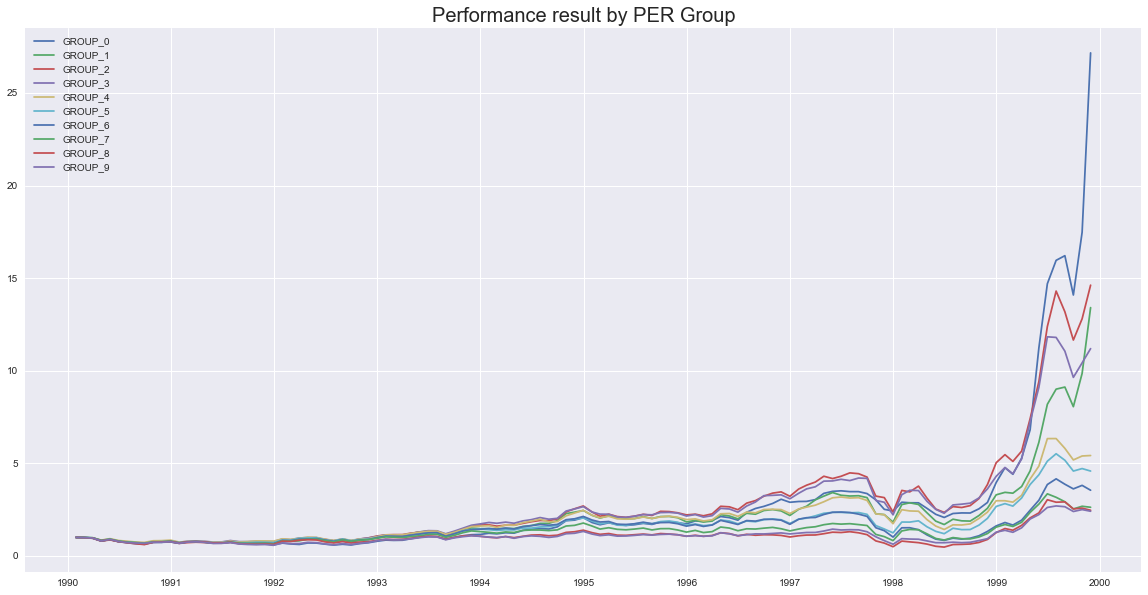

In [32]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

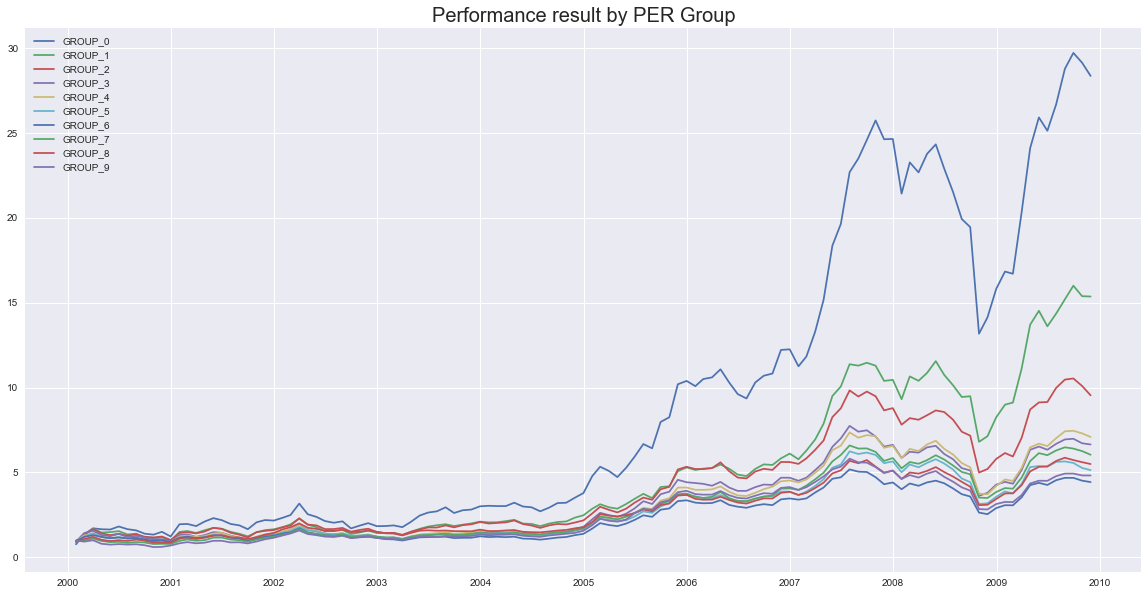

In [33]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

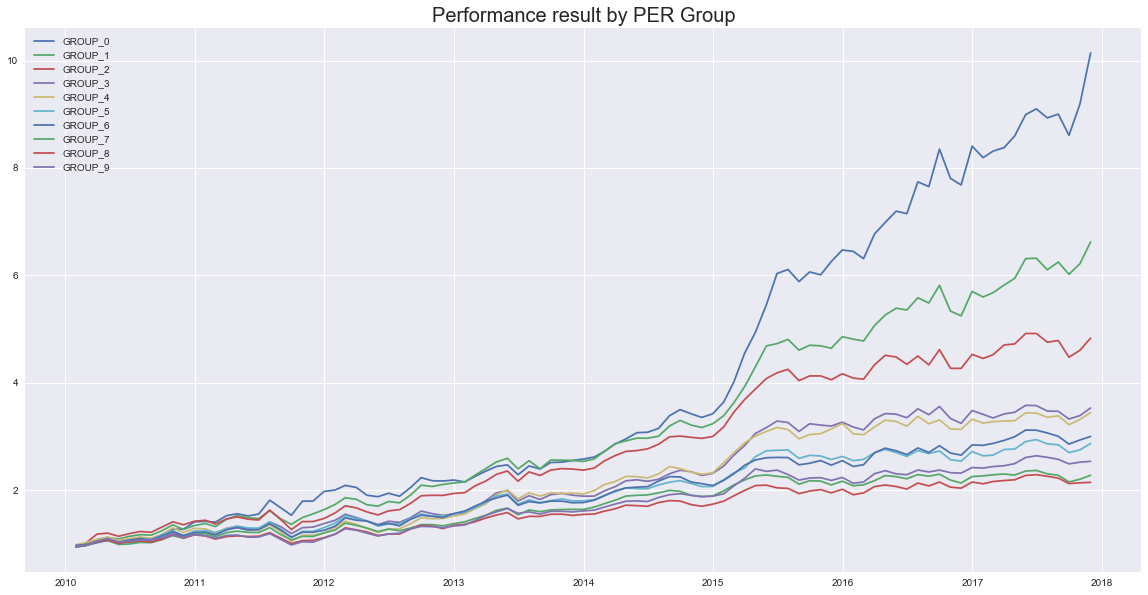

In [34]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

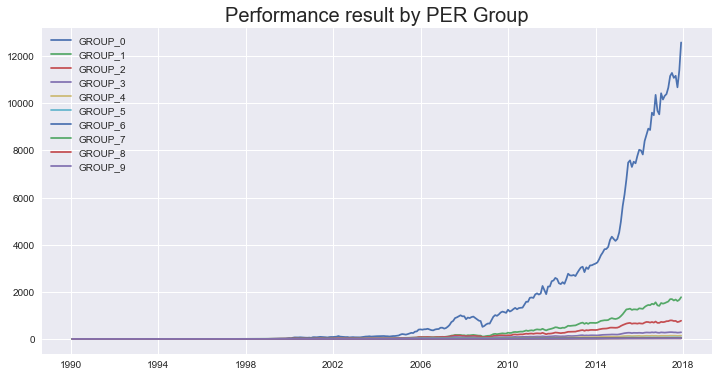

In [35]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

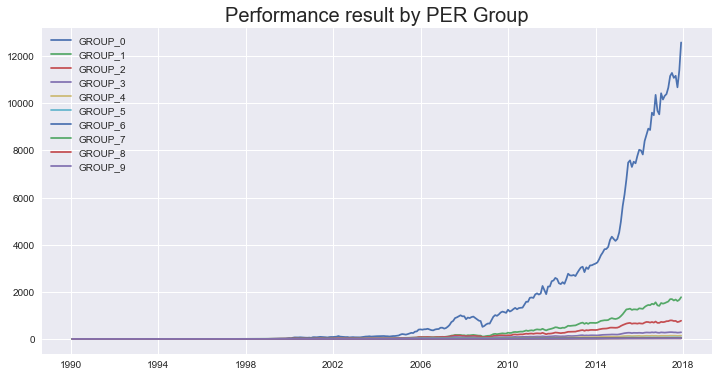

In [36]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

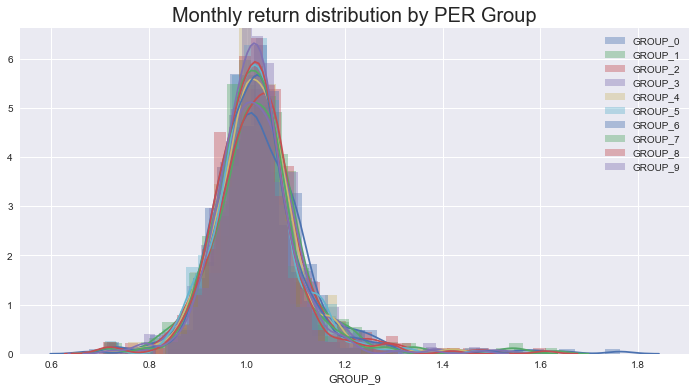

In [37]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [38]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,335.000,335.000,335.000,335.000,335.000,335.000,335.000,335.000,335.000,335.000
mean,1.034,1.027,1.024,1.021,1.019,1.016,1.015,1.014,1.014,1.013
std,0.114,0.102,0.096,0.094,0.087,0.085,0.086,0.084,0.088,0.080
min,0.677,0.717,0.697,0.708,0.707,0.709,0.713,0.708,0.706,0.723
25%,0.973,0.975,0.971,0.969,0.973,0.972,0.965,0.967,0.964,0.969
50%,1.019,1.022,1.022,1.016,1.014,1.014,1.013,1.010,1.010,1.011
75%,1.082,1.072,1.066,1.068,1.062,1.057,1.053,1.055,1.053,1.048
max,1.763,1.564,1.494,1.529,1.434,1.469,1.493,1.634,1.610,1.477
